
For Text Mining assignment

ONE: 1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [107]:
import numpy as np
import pandas as pd
import string
import spacy

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
%matplotlib inline

In [108]:
from google.colab import files
uploaded=files.upload()

Saving Elon_musk.csv to Elon_musk (2).csv


In [181]:
elon=pd.read_csv('Elon_musk.csv',encoding='cp1252')
elon

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [110]:
elon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [111]:
elon.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [112]:
elon[elon.duplicated()]

,Unnamed: 0,Text


In [113]:
elon.shape

(1999, 2)

In [176]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [177]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [178]:
pip install -U textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from textblob import TextBlob

In [186]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

elon['avg_word'] = elon['Text'].apply(lambda x: avg_word(x))
elon[['Text','avg_word']].head()

,Text,avg_word
0,@kunalb11 I’m an alien,4.750000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,5.384615
2,@joerogan @Spotify Great interview!,8.000000
3,@gtera27 Doge is underestimated,7.000000
4,@teslacn Congratulations Tesla China for amazi...,5.176471


In [184]:
stop = stopwords.words('english')

elon['stopwords'] = elon['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
elon[['Text','stopwords']].head()

,Text,stopwords
0,@kunalb11 I’m an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,4
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,5


In [183]:
elon['hastags'] = elon['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
elon[['Text','hastags']].head()

,Text,hastags
0,@kunalb11 I’m an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,2
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,1


In [187]:
elon['numerics'] = elon['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
elon[['Text','numerics']].head()

,Text,numerics
0,@kunalb11 I’m an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


In [188]:
elon['upper'] = elon['Text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
elon[['Text','upper']].head()

,Text,upper
0,@kunalb11 I’m an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


preprocessing

In [189]:
elon['Text'] = elon['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
elon['Text'].head()

0                               @kunalb11 i’m an alien
1    @id_aa_carmack ray tracing on cyberpunk with h...
2                  @joerogan @spotify great interview!
3                      @gtera27 doge is underestimated
4    @teslacn congratulations tesla china for amazi...
Name: Text, dtype: object

In [190]:
elon['Text'] = elon['Text'].str.replace('[^\w\s]','')
elon['Text'].head()

<ipython-input-190-61d758788d0a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  elon['Text'] = elon['Text'].str.replace('[^\w\s]','')


0                                 kunalb11 im an alien
1    id_aa_carmack ray tracing on cyberpunk with hd...
2                     joerogan spotify great interview
3                       gtera27 doge is underestimated
4    teslacn congratulations tesla china for amazin...
Name: Text, dtype: object

In [191]:
stop = stopwords.words('english')
elon['Text'] = elon['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
elon['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                     joerogan spotify great interview
3                          gtera27 doge underestimated
4    teslacn congratulations tesla china amazing ex...
Name: Text, dtype: object

In [192]:
freq = pd.Series(' '.join(elon['Text']).split()).value_counts()[:10]
freq

spacex            239
amp               218
tesla             166
erdayastronaut    142
rt                127
ppathole          123
flcnhvy           114
yes                86
great              76
teslaownerssv      73
dtype: int64

text preprocessing

In [114]:
elon=[Text.strip() for Text in elon.Text]
elon=[Text for Text in elon if Text]
elon[0:20]

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It’s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',
 '@fr

In [115]:
#part of Speech Tagging
nlp = spacy.load("en_core_web_sm")

one_elon = elon[8]
doc_elon = nlp(one_elon)
spacy.displacy.render(doc_elon, style="ent", jupyter=True)

/usr/local/lib/python3.8/dist-packages/spacy/displacy/__init__.py:206: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [116]:
for token in doc_elon:
  print(token,token.pos_)

@flcnhvy PROPN
@anonyx10 PROPN
Indeed PROPN
! PUNCT
Tweets NOUN
definitely ADV
do AUX
not PART
represent VERB
real ADJ
- PUNCT
world NOUN
time NOUN
allocation NOUN
. PUNCT


In [117]:
# Filtering Noun and verbs
n_v = [token.text for token in doc_elon if token.pos_ in ("NOUN","VERB")]
print(n_v[0:10])

['Tweets', 'represent', 'world', 'time', 'allocation']


In [118]:
#counting Tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(n_v)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_elon = pd.DataFrame(words_freq)
wf_elon.columns = ['word', 'count']

wf_elon[0:10]

,word,count
0,tweets,1
1,represent,1
2,world,1
3,time,1
4,allocation,1


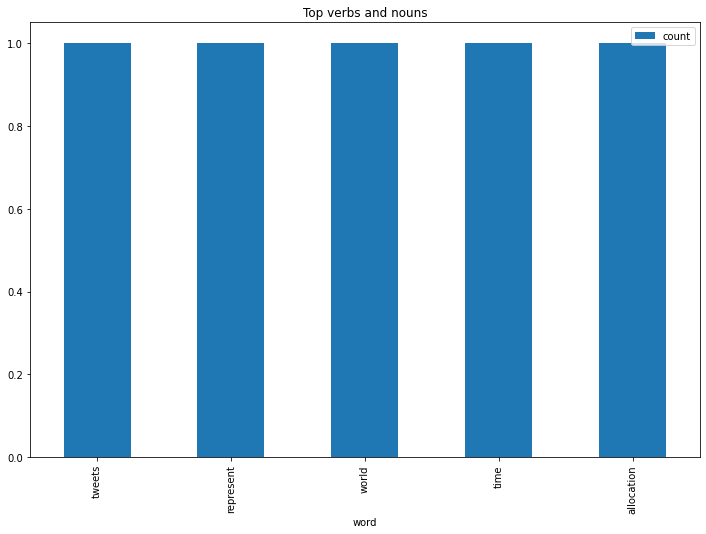

In [119]:
#visulisation 
wf_elon[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

In [120]:
from google.colab import files
uploaded=files.upload()

Saving Afinn.csv to Afinn (2).csv


In [121]:
afinn = pd.read_csv("Afinn.csv", sep=",", encoding="latin-1")
afinn.shape

(2477, 2)

In [122]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [123]:
df1 = pd.read_csv("Elon_musk.csv",encoding='cp1252')
df1 = [Text.strip() for Text in df1.Text] 
df1 = [Text for Text in df1 if Text] 

In [124]:
import nltk
nltk.download('punkt')##

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [125]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(df1))
sentences[5:15]

['Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O @freewalletorg Any crypto wallet that won’t give you your private keys should be avoided at all costs @freewalletorg Your app sucks RT @SpaceX: NASA has selected Falcon Heavy to launch the first two elements o

In [126]:
sent_df=pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
909,"@kenyanwalstreet Not actually a payout, just a..."
910,"It may never pay out, as the stock can’t b… ht..."
911,Details Aug 28.
912,AI symbiosis while u wait @vistacruiser7 @flcn...


In [127]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [128]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def c_sentiment(Text: str = None):
    sent_score = 0
    if Text:
        sentence = nlp(Text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [129]:
# Sentimental Analysis
c_sentiment(Text = "amazing")

4

In [154]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(c_sentiment)
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0     13
1      4
2      4
3     13
4      8
5      6
6     14
7     10
8      8
9    109
Name: word_count, dtype: int64

In [155]:
sent_df.sort_values(by="sentiment_value").tail(10)

,sentence,word_count,sentiment_value
808,Might be able to… https://t.co/FB7e5nOq2E @Pri...,72,11
157,@harsimranbansal @heydave7 It will most likely...,93,11
149,"@GUNMTLM3 @lexfridman No, but definitely this ...",45,11
182,"Also, w… https://t.co/IYdKttVsqk @cleantechnic...",99,12
80,@teslaownersSV This is a good one @MrBeastYT I...,38,13
638,It’s… https://t.co/IxhyT6NuiC @Teslarati Tesla...,65,13
578,The “open” areas… https://t.co/rabjKrtQlw @Sav...,138,14
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",231,15
710,We just haven’t observed the… https://t.co/mez...,72,15
104,@Erdayastronaut @SpaceX Was also thinking that...,94,16


In [156]:
sent_df["sentiment_value"].describe()

count    914.000000
mean       1.380744
std        2.694667
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


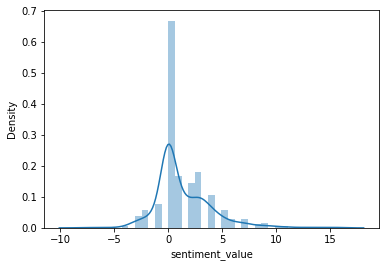

In [157]:
sns.distplot(sent_df["sentiment_value"])

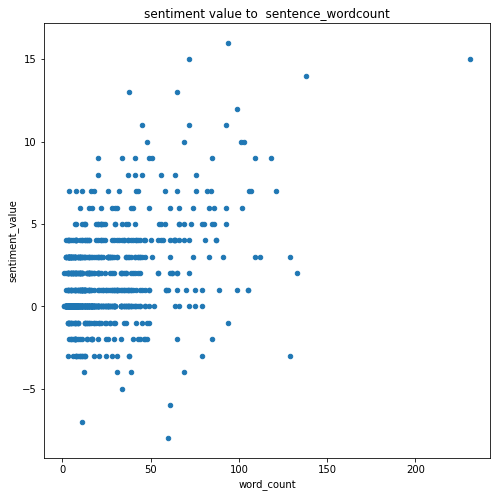

In [158]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='sentiment value to  sentence_wordcount')

Q1) Extract reviews of any product from ecommerce website like amazon

Q2) Perform emotion mining

In [141]:
import requests
from bs4 import BeautifulSoup

In [142]:
def get_soup(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [143]:
r_l = []
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for i in reviews:
            review  = i.find('span', {'data-hook': 'review-body'}).text.strip()    
            r_l.append(review)
    except:
        pass

In [144]:
for x in range(1,400):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Bullets-Wireless-Bass-Black/product-reviews/B092ZJVB6Z/ref=cm_cr_getr_d_paging_btm_next_383?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    print(len(r_l))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
170
180
190
200
210
220
230
240
240
250
250
260
270
280
290
290
300
300
310
320
320
330
340
350
360
370
380
390
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
620
630
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1010
1020
1030
1040
1050
1060
1060
1070
1080
1090
1100
1110
1120
1130
1140
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1370
1380
1390
1400
1410
1420
1420
1430
1440
1440
1450
1460
1470
1470
1480
1490
1500
1510
1520
1530
1540
1540
1550
1560
1570
1580
1590
1600
1600
1610
1620
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1910
1920
1930
1940
1950
1960
1970
1980
1990
1990
2000
201

In [159]:
df_1= pd.DataFrame(r_l, columns = ['Reviews'])
df_1

,Reviews
0,"I have been using these more than a year now, ..."
1,Quality is not 6 months after one said is not...
2,Never buy this product because it only lasts f...
3,Like but no any proble your product
4,We can get better than this for this price
...,...
3655,
3656,- not the greatest sound quality as advertised...
3657,It's nice
3658,"After 6 months used this earphones,Mike not wo..."


In [160]:
df_1.to_csv('Amazon_reviews.csv', index = False)

In [161]:
affinity_score = afinn.set_index("word")["value"].to_dict()
affinity_score

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [162]:
#performing emotion mining

#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.

nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_score

def calculate_sentiment(text: str=None):
    sent_score=0
    if text :
        sentence = nlp(text)
        for word in sentence:
             sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

calculate_sentiment(text = "amazing")

4

In [163]:
df_1["sentiment_value"] = df_1["Reviews"].apply(calculate_sentiment)

In [164]:
df_1["word_count"] = df_1["Reviews"].str.split().apply(len)
df_1["word_count"].head(10)

0    162
1     14
2     22
3      7
4      9
5      5
6     17
7     31
8      9
9      6
Name: word_count, dtype: int64

In [165]:
df_1.sort_values(by="sentiment_value").tail(10)

,Reviews,sentiment_value,word_count
1883,"Nice audio, good to carry, neck bend quality i...",23,22
128,I earlier had the normal Z and bullets 2. But ...,23,140
0,"I have been using these more than a year now, ...",24,162
284,"-I used ""Blaupunkt BE50 XL Bluetooth Wireless ...",25,181
254,"First of all ,A big thanks to Amazon for deliv...",26,103
163,The media could not be loaded.\n ...,27,296
607,This is my second purchase of this earphone. T...,28,147
319,"Pros: Very low latency, so it's a good one for...",28,128
296,I have received a product with very good packi...,28,124
239,"Good purchase,i feel like i have invested my m...",28,76


In [166]:
# Sentiment score of the whole review
df_1['sentiment_value'].describe()

count    3660.000000
mean        2.417213
std         3.566183
min       -28.000000
25%         0.000000
50%         3.000000
75%         3.000000
max        28.000000
Name: sentiment_value, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


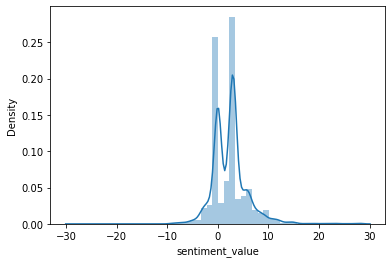

In [167]:
import seaborn as sns
sns.distplot(df_1["sentiment_value"])

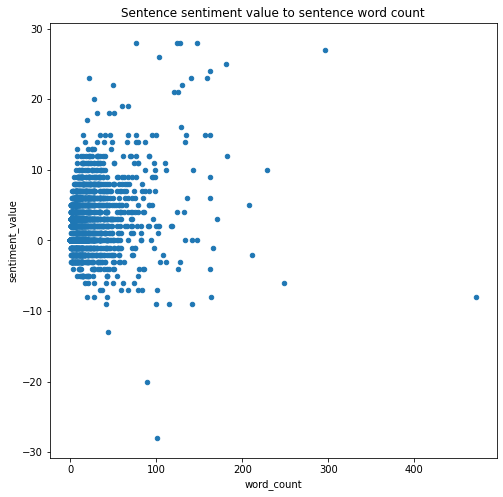

In [168]:
df_1.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')


In [169]:
df_1

,Reviews,sentiment_value,word_count
0,"I have been using these more than a year now, ...",24,162
1,Quality is not 6 months after one said is not...,2,14
2,Never buy this product because it only lasts f...,-1,22
3,Like but no any proble your product,1,7
4,We can get better than this for this price,0,9
...,...,...,...
3655,,0,0
3656,- not the greatest sound quality as advertised...,1,36
3657,It's nice,3,2
3658,"After 6 months used this earphones,Mike not wo...",-3,11


In [170]:
pip install -U textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 7.4 MB/s 
  Attempting uninstall: textblob
    Found existing installation: textblob 0.15.3
    Uninstalling textblob-0.15.3:
      Successfully uninstalled textblob-0.15.3


In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from textblob import TextBlob